# Modeling Neighborhood Dynamics

We will use the Columbus MSA as an example to illustrate the `dynamics` module of `geosnap`.

* Modeling transition rates between neighborhood types across time
* Analyzing whole neighborhood sequence

## Data preperation

* Geodemographics for neighborhood segamentation

In [1]:
from geosnap.data import Community, data_store as store
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys, os
import warnings
warnings.filterwarnings("ignore")

In [2]:
columbus = Community.from_ltdb(msa_fips='18140')

In [3]:
columbus1 = columbus.cluster(columns=['median_household_income', 
                                      'p_poverty_rate', 
                                      'p_edu_college_greater', 
                                      'p_unemployment_rate'], 
                             method='ward')

In [4]:
columbus1.gdf.head()

,year,geoid,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,...,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled,geometry,ward
0,1970,39041010100,NaN,73.000000,NaN,NaN,1238.000000,1483.000000,NaN,32.000000,...,2001.000000,NaN,14.114495,0.451213,NaN,NaN,NaN,4.244219,"POLYGON ((-83.082292 40.29946, -83.082549 40.3...",3
1,1970,39041010200,NaN,5.472672,NaN,NaN,1426.479469,1599.197822,NaN,5.387974,...,1529.132207,NaN,12.308566,0.120177,NaN,NaN,NaN,8.510786,"POLYGON ((-83.071978 40.327509, -83.02909 40.3...",1
2,1970,39041010420,NaN,1.505399,NaN,NaN,126.788033,147.696350,NaN,0.167267,...,126.286232,NaN,9.413255,0.042212,NaN,NaN,NaN,3.292529,"POLYGON ((-83.09434499999999 40.328399, -83.09...",0
3,1970,39041010421,NaN,1.095593,NaN,NaN,92.273573,107.490183,NaN,0.121733,...,91.908363,NaN,9.413270,0.042212,NaN,NaN,NaN,3.292555,"POLYGON ((-83.126183 40.306402, -83.1249409999...",0
4,1970,39041010422,NaN,2.941651,NaN,NaN,247.761943,288.619354,NaN,0.326855,...,246.780934,NaN,9.413450,0.042211,NaN,NaN,NaN,3.292857,"POLYGON ((-83.12404599999999 40.330013, -83.11...",0


## Estimating the transition rates between neighborhood types

#### Nonspatial transition rates - Classic Markov modeling of transitions 

In [27]:
m = columbus1.transition(cluster_col="ward")
type(m)

giddy.markov.Markov

In [28]:
m.p

array([[0.79189189, 0.00540541, 0.0027027 , 0.13243243, 0.06216216,
        0.00540541],
       [0.0203252 , 0.75609756, 0.10569106, 0.11382114, 0.        ,
        0.00406504],
       [0.00917431, 0.20183486, 0.75229358, 0.01834862, 0.        ,
        0.01834862],
       [0.1959799 , 0.18341709, 0.00251256, 0.61809045, 0.        ,
        0.        ],
       [0.32307692, 0.        , 0.        , 0.        , 0.66153846,
        0.01538462],
       [0.09375   , 0.0625    , 0.        , 0.        , 0.        ,
        0.84375   ]])

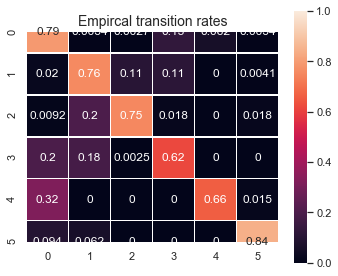

In [29]:
sns.set()
fig, ax = plt.subplots(1,1,figsize = (5,4)) 
im=sns.heatmap(m.p, annot=True, linewidths=.5, cbar=True, vmin=0, vmax=1,
              square=True, xticklabels= m.classes, yticklabels=m.classes, ax=ax)
im.set_title("Empircal transition rates",fontsize=14) 
plt.tight_layout()

#### Spatially conditional transition rates - Spatial Markov modeling of transitions 

In [60]:
import numpy as np
np.random.seed(5)

In [61]:
sm = columbus1.transition(cluster_col="ward", w_type="queen")
type(sm)

giddy.markov.Spatial_Markov

In [62]:
sm.p

array([[0.79189189, 0.00540541, 0.0027027 , 0.13243243, 0.06216216,
        0.00540541],
       [0.0203252 , 0.75609756, 0.10569106, 0.11382114, 0.        ,
        0.00406504],
       [0.00917431, 0.20183486, 0.75229358, 0.01834862, 0.        ,
        0.01834862],
       [0.1959799 , 0.18341709, 0.00251256, 0.61809045, 0.        ,
        0.        ],
       [0.32307692, 0.        , 0.        , 0.        , 0.66153846,
        0.01538462],
       [0.09375   , 0.0625    , 0.        , 0.        , 0.        ,
        0.84375   ]])

In [63]:
sm.P[0]

array([[0.82413793, 0.        , 0.        , 0.10689655, 0.06896552,
        0.        ],
       [0.25      , 0.5       , 0.125     , 0.125     , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.5       , 0.        , 0.        ,
        0.        ],
       [0.23809524, 0.0952381 , 0.        , 0.66666667, 0.        ,
        0.        ],
       [0.21621622, 0.        , 0.        , 0.        , 0.75675676,
        0.02702703],
       [0.16666667, 0.        , 0.        , 0.        , 0.        ,
        0.83333333]])

In [64]:
sm.P[0]

array([[0.82413793, 0.        , 0.        , 0.10689655, 0.06896552,
        0.        ],
       [0.25      , 0.5       , 0.125     , 0.125     , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.5       , 0.        , 0.        ,
        0.        ],
       [0.23809524, 0.0952381 , 0.        , 0.66666667, 0.        ,
        0.        ],
       [0.21621622, 0.        , 0.        , 0.        , 0.75675676,
        0.02702703],
       [0.16666667, 0.        , 0.        , 0.        , 0.        ,
        0.83333333]])

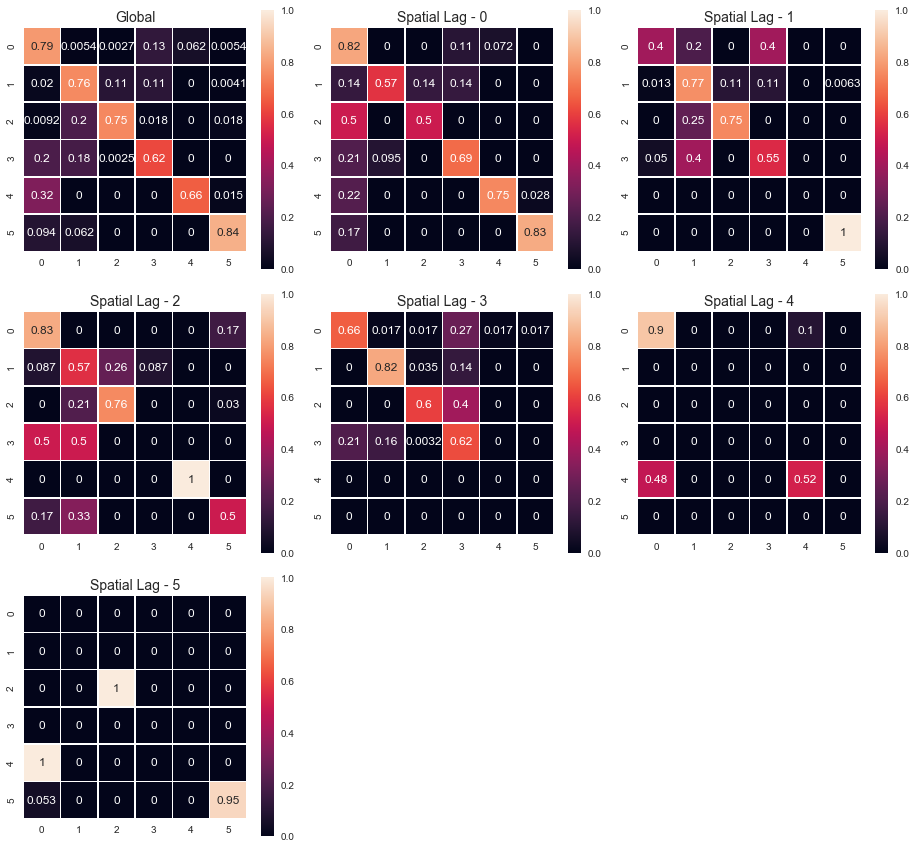

In [15]:
fig, axes = plt.subplots(3,3,figsize = (13,12)) 
ls = sm.classes
lags_all = ["Spatial Lag - "+str(l)  for l in ls]
for i in range(3):
    for j in range(3):
        ax = axes[i,j]
        if i==0 and j==0:
            p_temp = sm.p
            sns.heatmap(p_temp, annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,
                      square=True, xticklabels= ls, yticklabels=ls)
            ax.set_title("Global",fontsize=14) 
        # Loop over data dimensions and create text annotations.
        else:
            n = i*3+j-1
            if n>=len(sm.classes):
                ax.axis('off')
                continue
                
            p_temp = sm.P[n]
            im=sns.heatmap(p_temp, annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,
                          square=True, xticklabels= ls, yticklabels=ls)

            ax.set_title(lags_all[n],fontsize=14) 
plt.tight_layout()

## Whole sequence analysis

* evaluate the distance/disimilarity between every pair of neighborhood sequences based on a selected sequence method
* apply clustering algorithms to obtain a segmentation of neighborhood sequences

### (1) Comparing sequences of transitions.

transition-oriented optimal matching.

In [15]:
# Use the sequence method to obtain the distance matrix of neighborhood sequences
gdf_new, df_wide, seq_dis_mat = columbus1.sequence(seq_clusters=5,
                                                   dist_type="tran",
                                                   cluster_col="ward")
seq_dis_mat

array([[0., 5., 1., ..., 3., 3., 5.],
       [5., 0., 5., ..., 2., 2., 0.],
       [1., 5., 0., ..., 3., 3., 5.],
       ...,
       [3., 2., 3., ..., 0., 0., 2.],
       [3., 2., 3., ..., 0., 0., 2.],
       [5., 0., 5., ..., 2., 2., 0.]])

In [16]:
df_wide.head()

year,1970,1980,1990,2000,2010,tran_5
geoid,,,,,,
39041010100,3,3,0,2,3,1
39041010200,1,3,3,3,3,3
39041010420,0,0,3,0,3,1
39041010421,0,0,3,3,0,1
39041010422,0,0,3,3,0,1


In [17]:
df_wide.values[0]

array([3, 3, 0, 2, 3, 1])

In [7]:
from geosnap.visualize import indexplot_seq

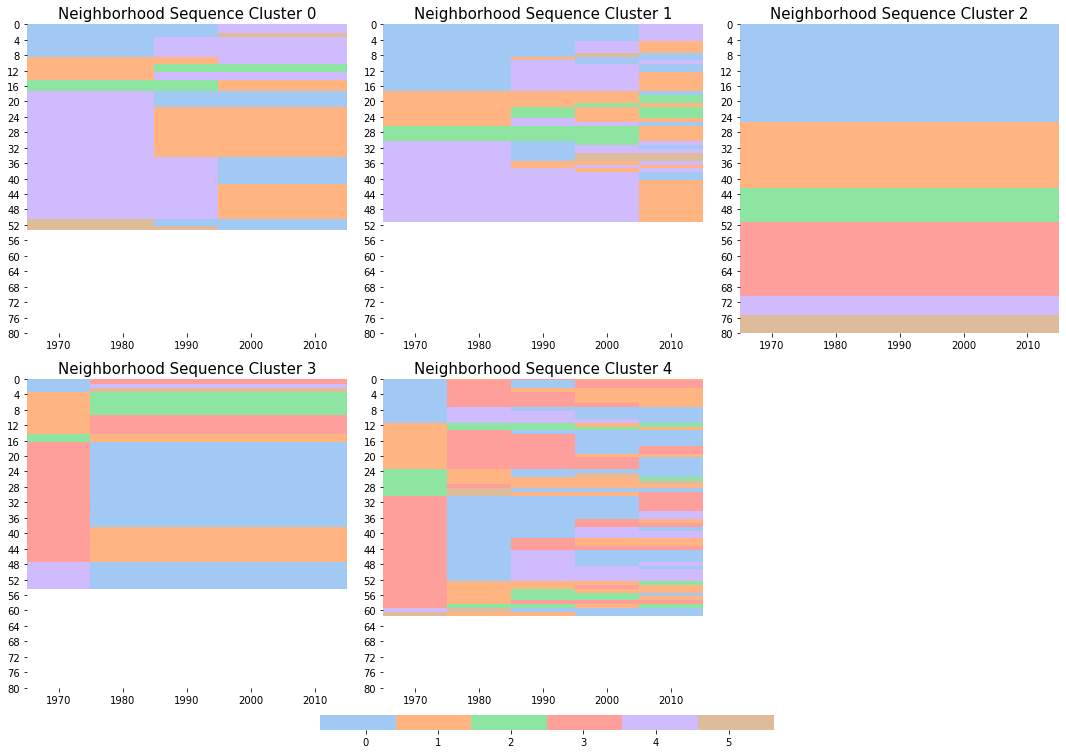

In [8]:
indexplot_seq(df_wide, clustering="tran_5", palette="pastel")

### (2) Hamming distance

In [18]:
gdf_new, df_wide, seq_dis_mat = columbus1.sequence(seq_clusters=8,dist_type="hamming", cluster_col="ward")
seq_dis_mat

array([[0., 3., 4., ..., 4., 4., 3.],
       [3., 0., 3., ..., 2., 2., 0.],
       [4., 3., 0., ..., 4., 4., 3.],
       ...,
       [4., 2., 4., ..., 0., 0., 2.],
       [4., 2., 4., ..., 0., 0., 2.],
       [3., 0., 3., ..., 2., 2., 0.]])

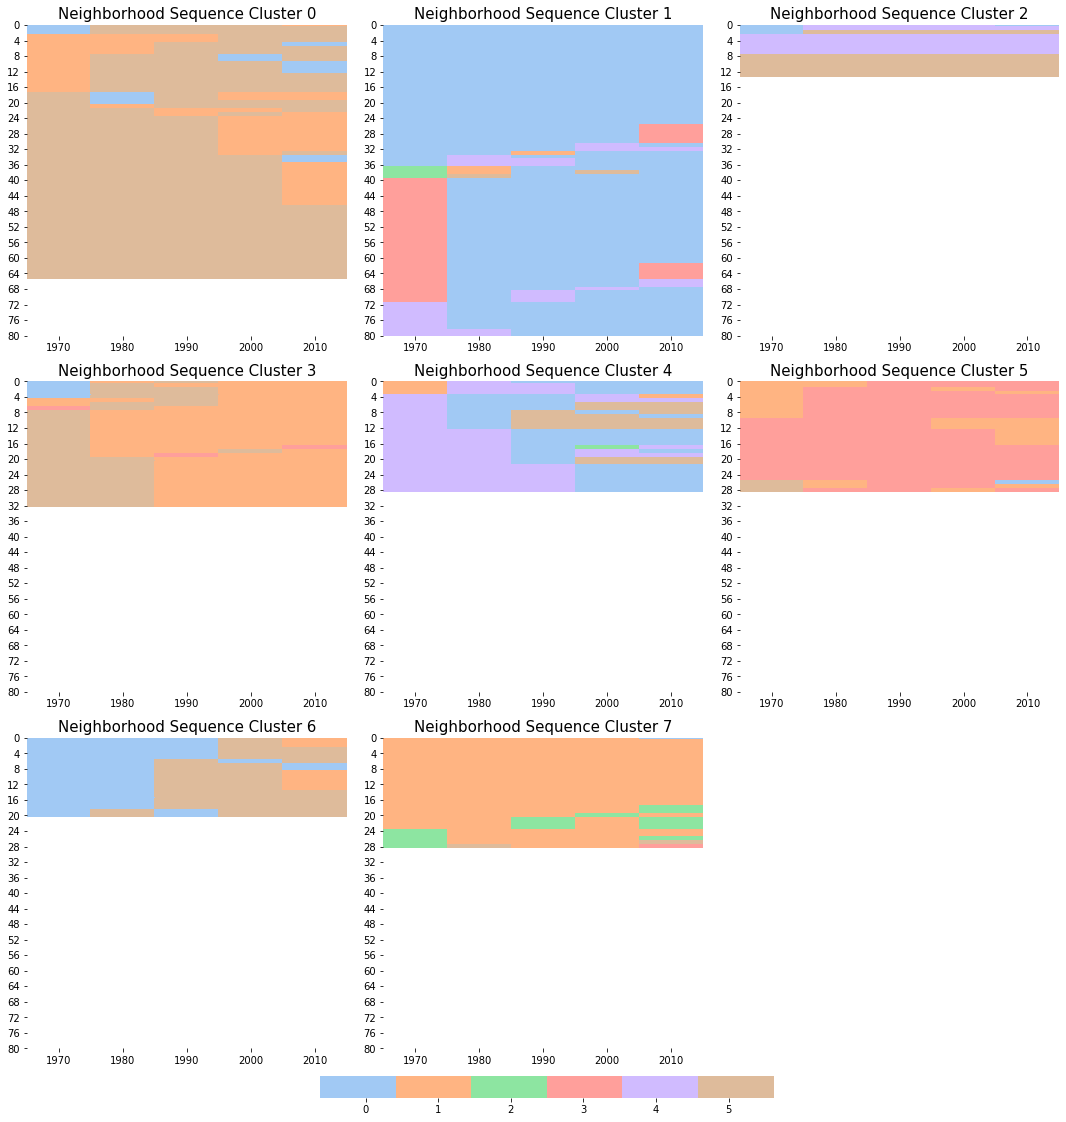

In [22]:
indexplot_seq(df_wide, clustering="hamming_8", palette="pastel")

Change the number of clusters

In [19]:
gdf_new, df_wide, seq_dis_mat = columbus1.sequence(seq_clusters=5,dist_type="hamming", cluster_col="ward")
seq_dis_mat

array([[0., 3., 4., ..., 4., 4., 3.],
       [3., 0., 3., ..., 2., 2., 0.],
       [4., 3., 0., ..., 4., 4., 3.],
       ...,
       [4., 2., 4., ..., 0., 0., 2.],
       [4., 2., 4., ..., 0., 0., 2.],
       [3., 0., 3., ..., 2., 2., 0.]])

In [20]:
df_wide.values[0]

array([3, 3, 0, 2, 3, 2])

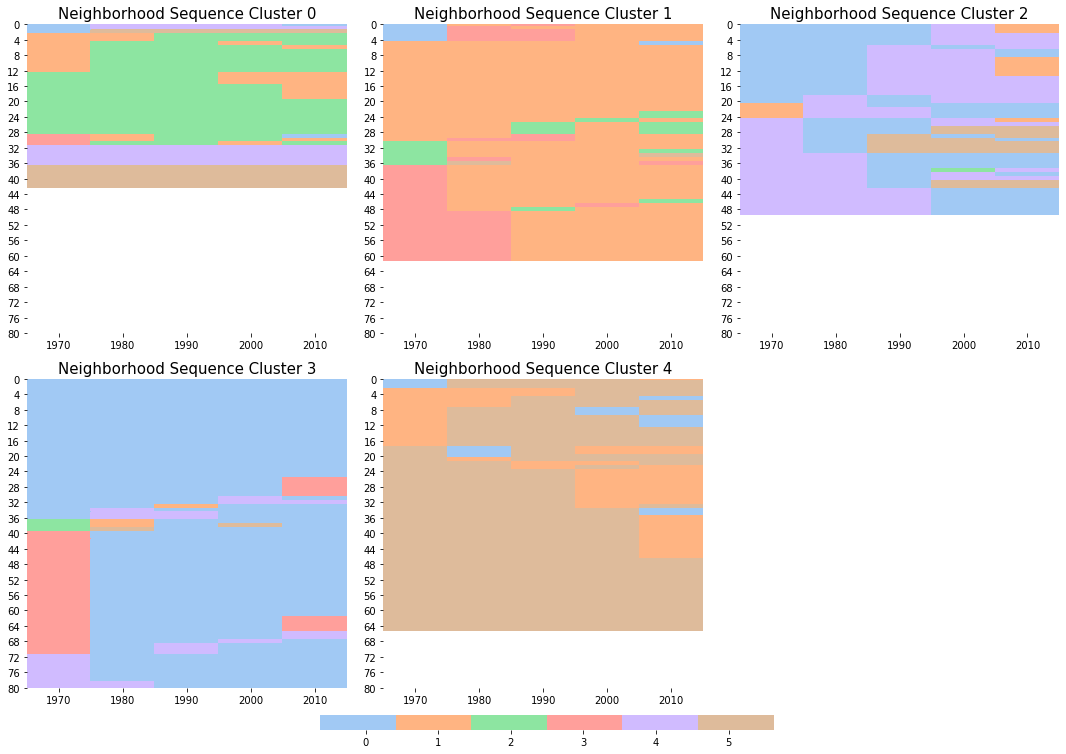

In [10]:
indexplot_seq(df_wide, clustering="hamming_5", palette="pastel")

### (3) Arbitrary distance

 substitution=0.5, indel=1

In [15]:
gdf_new, df_wide, seq_dis_mat = columbus1.sequence(seq_clusters=5,
                                                   dist_type="arbitrary", cluster_col="ward")
df_wide.head()

year,1970,1980,1990,2000,2010,arbitrary_5
geoid,,,,,,
39041010100,3,3,0,2,3,2
39041010200,1,3,3,3,3,4
39041010420,0,0,3,0,3,2
39041010421,0,0,3,3,0,2
39041010422,0,0,3,3,0,2


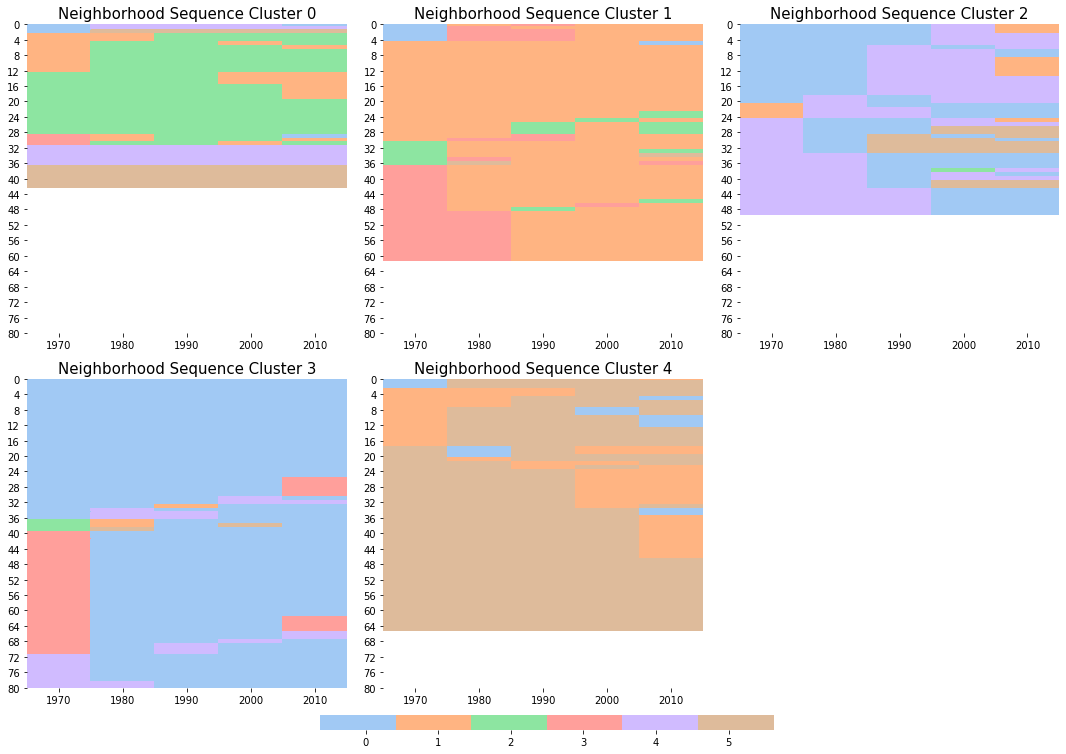

In [16]:
indexplot_seq(df_wide, clustering="arbitrary_5", palette="pastel")